# Plotting routines

Here, we show how to use internal function to plot the results of profile likelihood calculation.
There are 3 plotting routines available: `plot_likelihoods`, `plot_paths`, and `plot_likelihoods_and_paths`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from profile_likelihood import profile_likelihood

%matplotlib inline

## Define the model

The model is defined as the sum of trigonometric functions, in the form of
$$ f\left(t; \vec{\theta}\right) = \sin(\theta_0 t) + \cos(\theta_1 t), $$
where we sample at 3 time points $t = [1.0, 1.2, 2.0]^T$.
The default parameters are chosen to be $\vec{\theta} = [1.0, 2.5]^T$.
The data is set to be the predictions of the model at the default parameters and the standard deviation is chosen to be 30% of the data.
The implementation of this model is given in `model_trigonometric.py`.

In [2]:
import model_trigonometric as model
import manifold

## Load computation results

To save some time, we will just load the saved results.

In [3]:
# Define the likelihood object
likelihood = profile_likelihood(
    model.residuals, model.nparams, model.npred, model.param_names
)

# Load results
results = likelihood.load_results("results_trig_model.json", model.best_fit)

Load data from results_trig_model.json ....


## Plot the negative log-likelihood

This is done by calling `plot_likelihoods`.
This will plot the cost along the profile likelihood path for each parameter.

Generating 2 plots of cost profile


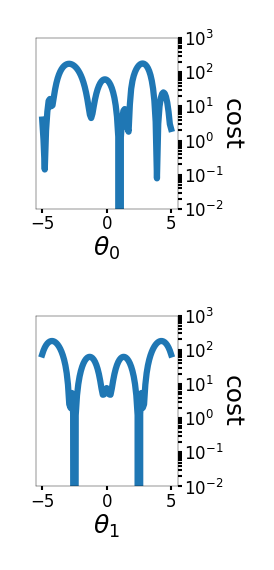

In [4]:
axes = likelihood.plot_profiles(cpscale="log", cplim=(1e-2, 1e3))
plt.tight_layout()

The dashed vertical lines above show the location of the best-fit parameters.

## Plot the profile likelihood paths

This is done using `plot_paths`.
The profile likelihood paths are projected to 2-dimensional plane.
In the case where there are more than 2 parameters, the plots will be in like a lower triangular matrix.


Generating 1 plots of profile likelihood paths.


<AxesSubplot:xlabel='$\\theta_0$', ylabel='$\\theta_1$'>

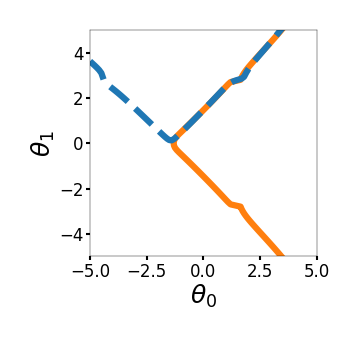

In [5]:
likelihood.plot_paths(bounds=[-5, 5], aspect=1)

The dashed curve is the paths scanning the parameter on the horizontal direction.
The small black dot above show the location of the best-fit parameters.

## Plot the paths and the cost

Using `plot_likelihoods_and_paths`, we can combine the two figures above.
In addition to the plot of the paths, the cost will be plotted on the diagonal.

Generating 3 plots of profile likelihood and the paths.


array([[<AxesSubplot:ylabel='cost'>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='$\\theta_0$', ylabel='$\\theta_1$'>,
        <AxesSubplot:xlabel='$\\theta_1$', ylabel='cost'>]], dtype=object)

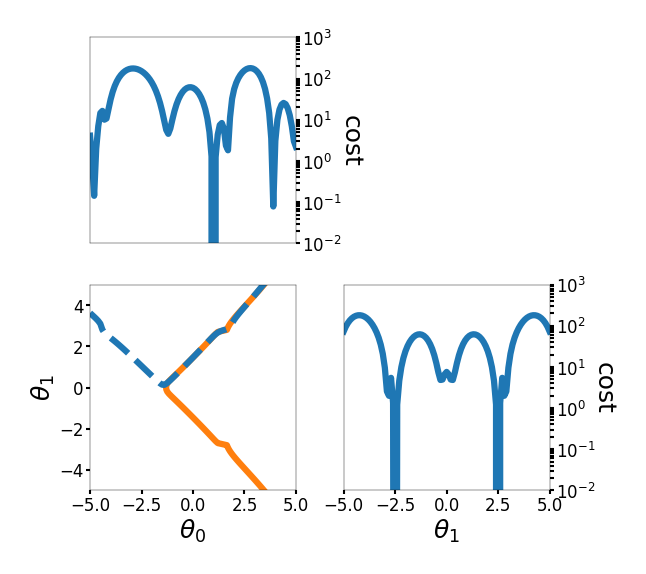

In [6]:
likelihood.plot_paths_and_profiles(bounds=[-5, 5], aspect=1, cpscale="log", cplim=(1e-2, 1e3))